# Linear Regression

## What is Regression Analysis?

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. For example, relationship between rash driving and number of road accidents by a driver is best studied through regression.


Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distance of data points from the curve or line is minimized. The topic will be explained in detail in coming sections.

## Why do we use Regression Analysis?

As mentioned above,Regression analysis estimates the relationship between two or more variables. Let’s understand this with an easy example:

Let’s say, you want to estimate growth in sales of a company based on current economic conditions. You have the recent company data which indicates that the growth in sales is around two and a half times the growth in the economy. Using this insight, we can predict future sales of the company based on current & past information.

There are multiple benefits of using Regression analysis. They are as follows:

   * It indicates the significant relationships between dependent variable and independent variable.
   * It indicates the strength of impact of multiple independent variables on dependent variable.

Regression analysis also allows us to compare the effects of variables measured on different scales, such as the effect of price changes and the number of promotional activities. These benefits help Market Researchers / Data Analysts / Data Scientists to eliminate and evaluate the best set of variables to be used for building predictive models.

## Linear Regression

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# this allows plots to appear directly in the notebook


## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use Linear regression to answer those questions!

In [3]:
# read data into a DataFrame
data=pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

<Axes: xlabel='Newspaper', ylabel='Sales'>

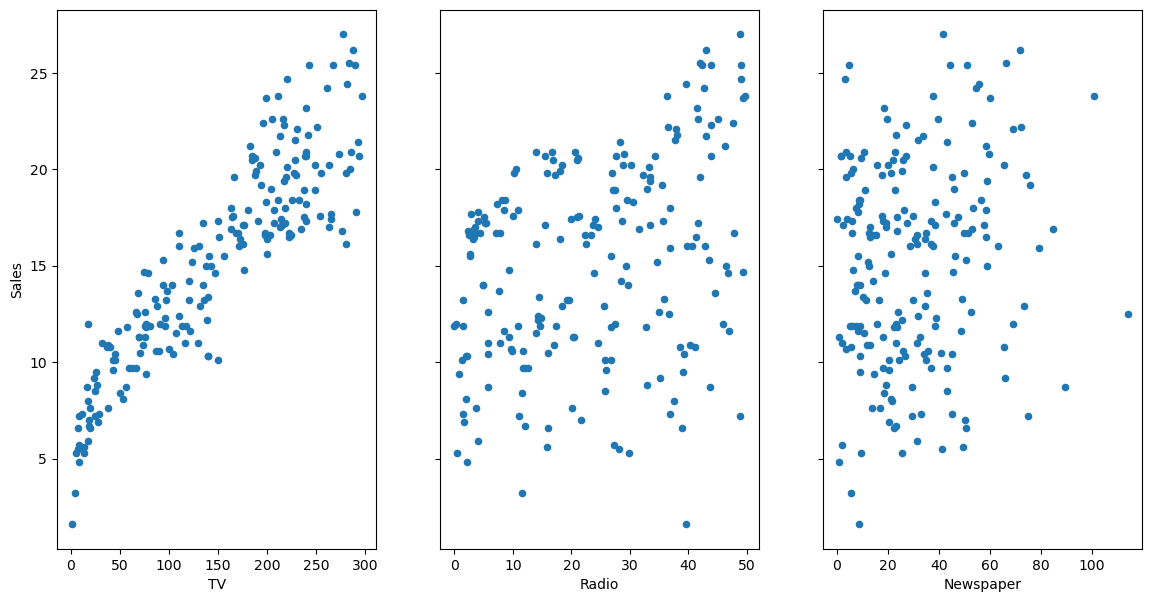

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig , axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(14,7))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

These general questions might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="images/08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The red lines are the **residuals**, which is the distance between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="images/08_slope_intercept.png">

### The mathematics behind the Least Squares Method.

Take a quick look at the plot created. Now consider each point, and know that each of them have a coordinate in the form (X,Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distanace between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$


We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

## scikit-learn

### Introduction

Since its release in 2007, scikit-learn has become one of the most popular open source Machine Learning libraries for Python. scikit-learn provides algorithms for Machine Learning tasks including classification, regression, dimensionality reduction, and clustering. It also provides modules for extracting features, processing data, and evaluating models.

Conceived as an extension to the SciPy library, scikit-learn is built on the popular Python libraries NumPy and matplotlib. NumPy extends Python to support efficient operations on large arrays and multidimensional matrices. matplotlib provides visualization tools, and SciPy provides modules for scientific computing.

scikit-learn is popular for academic research because it has a well-documented, easy-to-use, and versatile API. Developers can use scikit-learn to experiment with different algorithms by changing only a few lines of the code. scikit-learn wraps some popular implementations of machine learning algorithms, such as LIBSVM and LIBLINEAR. Other Python libraries, including NLTK, include wrappers for scikit-learn. scikit-learn also includes a variety of datasets, allowing developers to focus on algorithms rather than obtaining and cleaning data.

Licensed under the permissive BSD license, scikit-learn can be used in commercial applications without restrictions. Many of scikit-learn's algorithms are fast and scalable to all but massive datasets. Finally, scikit-learn is noted for its reliability; much of the library is covered by automated tests.

In [6]:
# create X and y
feature_cols=['TV']
x=data[feature_cols]
y=data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

# print intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.9748214882298925
[0.05546477]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [7]:
# manually calculate the prediction
6.97482+0.055464*50

9.74802

Thus, we would predict Sales of **9,409 widgets** in that market.

In [9]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV':[100]})
X_new.head()

,TV
0,100


In [10]:
# use the model to make predictions on a new value
lm.predict(X_new)

NameError: name 'lm' is not defined

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [8]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [11]:
# make predictions for those x values and store them
preds=lr.predict(X_new)
preds

array([12.52129854])

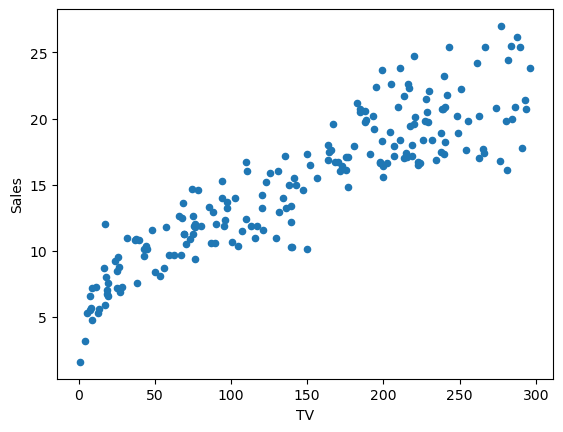

In [14]:
# first, plot the observed data
data.plot(kind='scatter',x='TV',y='Sales')
# then, plot the least squares line
plt.plot(X_new,preds,c='red',linewidth=2)

## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** It's a High bias/low variance model. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [16]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales ~ TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [17]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="images/08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [18]:
# print the R-squared value for the model
lm.rsquared

0.8121757029987414

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [19]:
# create X and y
feature_cols=['TV','Radio','Newspaper']
x=data[feature_cols]
y=data.Sales

lr=LinearRegression()
lr.fit(x,y)


# print intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [20]:
lm=smf.ols(formula='Sales ~ TV+Radio+Newspaper',data=data).fit()
lm.conf_int()
lm.summary()           


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           8.13e-99
Time:                        02:49:36   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **what features has to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [ ]:
# only include TV and Radio in the model


In [ ]:
# add Newspaper to the model (which we believe has no association with Sales)


**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.
